In [1]:
import torch
import matplotlib.pyplot as plt
from torchviz import make_dot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
torch.arange(5, dtype=torch.float32)

tensor([0., 1., 2., 3., 4.])

/tmp/ipykernel_44677/317308670.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(torch.arange(5, dtype=torch.float32), requires_grad=True)


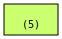

In [3]:
v = torch.tensor(torch.arange(5, dtype=torch.float32), requires_grad=True)
make_dot(v)

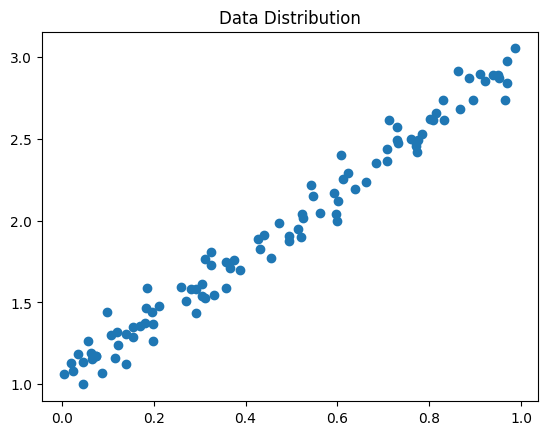

In [4]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)
y = true_w * x + true_b + epsilon

plt.scatter(x, y)
plt.title("Data Distribution")
plt.show()

In [5]:
idx = np.arange(N)
np.random.shuffle(idx)
idx[:4]

array([76, 83, 80, 98])

In [6]:
train_idx = idx[:int(N*0.8)]
val_idx = idx[int(N*0.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

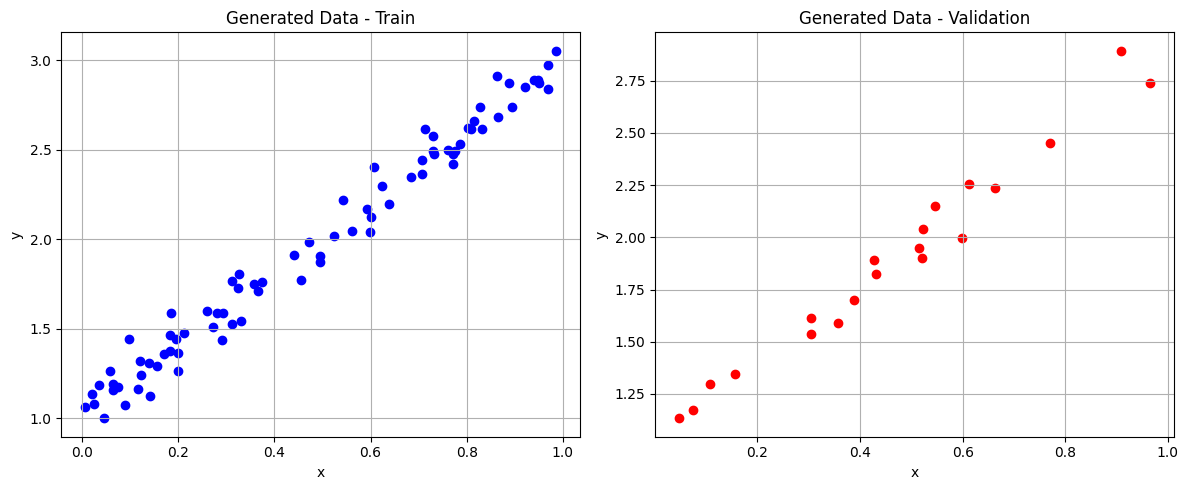

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(x_train, y_train, color='blue')
axes[0].set_title("Generated Data - Train")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid()

axes[1].scatter(x_val, y_val, color='red')
axes[1].set_title("Generated Data - Validation")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].grid()

plt.tight_layout()
plt.show()

In [8]:
np.random.seed(42)
w = np.random.randn(1)
b = np.random.randn(1)
w, b

(array([0.49671415]), array([-0.1382643]))

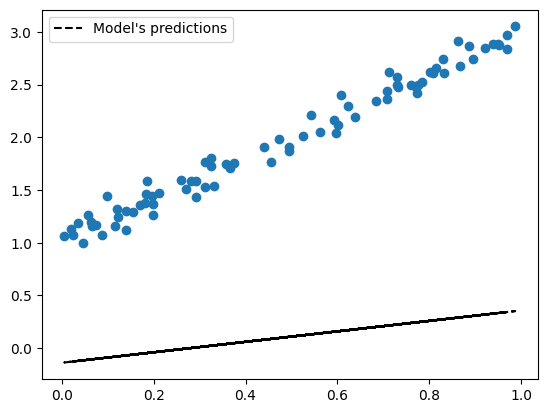

In [9]:
yhat = w * x_train + b
plt.scatter(x_train, y_train)
plt.plot(x_train, yhat, label="Model's predictions", color='black', linestyle='--')
plt.legend()
plt.show()

In [10]:
error = (yhat - y_train)
loss = (error ** 2).mean()
print(loss)

3.661172358225687


So far we have just computed the loss for the randomly initialized values of w and b, what if we did the same for all possible values of w and b? Well, not all possible values but all combinations of evenly spaced values in a given range, say 100 linearly spaced values in a range: like (range_b: -2, 4) and (range_w: -1, 5)

In [11]:
# Reminder
# true_b = 1
# true_w = 2

# we have to split the ranges in 100 evenly spaced intervals (not numbers, intervals) each.
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w  -3, true_w + 3, 101)

# meshgrid is a handy function that generates a grid of w and b values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [34]:
ws[:, 0][:3], bs[0][:3]

(array([-1.  , -0.94, -0.88]), array([-2.  , -1.94, -1.88]))

In [ ]:
ws_bs = ws.flatten(), bs.flatten()
ws_bs = np.stack(ws_bs, axis=1)
ws_bs   # [[w_0, b_0], [w_0, b_1], ..., [w_n, b_n]]

array([[-1.  , -2.  ],
       [-1.  , -1.94],
       [-1.  , -1.88],
       ...,
       [ 5.  ,  3.88],
       [ 5.  ,  3.94],
       [ 5.  ,  4.  ]], shape=(10201, 2))

Next, we could use those values to compute the corresponding predictions, errors, and losses. Let's start by taking a single data point from the training set and computing the predictions for every combination in our grid.

In [52]:
ws_bs[:, 0]

array([0., 0., 0., ..., 6., 6., 6.], shape=(10201,))

In [55]:
dummy_x = x_train[0]
dummy_yhat = ws_bs[:, 0] * dummy_x + ws_bs[:, 1]
dummy_yhat

array([-2.        , -1.94      , -1.88      , ...,  8.50762208,
        8.56762208,  8.62762208], shape=(10201,))